# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.958495e+01     7.483566e+00
 * time: 0.0048542022705078125
     1     2.549350e+01     4.125447e+00
 * time: 0.01442098617553711
     2     1.885650e+01     5.191608e+00
 * time: 0.03849601745605469
     3     1.604959e+01     4.325411e+00
 * time: 0.06185007095336914
     4     1.598709e+01     6.780410e+00
 * time: 0.08060598373413086
     5     1.242212e+01     1.852531e+00
 * time: 0.10447001457214355
     6     1.105497e+01     2.757794e+00
 * time: 0.12361598014831543
     7     1.049191e+01     1.770793e+00
 * time: 0.14254212379455566
     8     1.018181e+01     1.235823e+00
 * time: 0.16176104545593262
     9     9.919536e+00     1.141109e+00
 * time: 0.18093299865722656
    10     9.701735e+00     8.767585e-01
 * time: 0.19944310188293457
    11     9.630443e+00     8.479161e-01
 * time: 0.2138071060180664
    12     9.546001e+00     5.954186e-01
 * time: 0.22815418243408203
    13     9.464283e+00     3.516231e-01
 * time

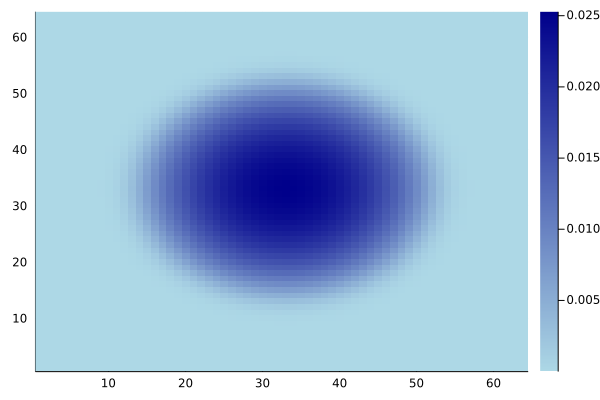

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)